In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

%matplotlib inline

comments = pd.read_csv("../toxic_comment_data/train.csv")
comments2 = pd.read_csv("../toxic_comment_data/test_with_solutions.csv")
comments2 = comments2.drop(columns=["Usage"])
comments = pd.concat([comments,comments2])

## Options for dealing with missing data

1. Remove feature with missing data. This is definitely the simplest option, however this is most likely not a good idea since the contestants did find correlations between the comment date and the target value.

2. Remove instances (rows) with features missing. In this case we have to determine whether the data is missing uniformly, i.e. there is no correlation between the fact that a value is missing and some other feature. To do this, we graph the missing feature against another feature.

3. Use a model with the target value as the missing data. This also requires that the missing data is missing uniformly, so that we can perform a random sampling of instances without missing data that will act as our test set. This would be my choice, however this also adds a bit of extra work.

### IMPORTANT: Training data and test data have to coincide.
    CONSEQUENCE: Whichever way we decide to deal with the missing data, we first have to make our changes accross all data, and only then divide it up into training and test data. Intuition says that we shouldn't mess with test data in any way that would not be reproducible in a production environment where the production data is not necessarily in our control.
    
**Below is an indication as to how many of our values are missing.**
    

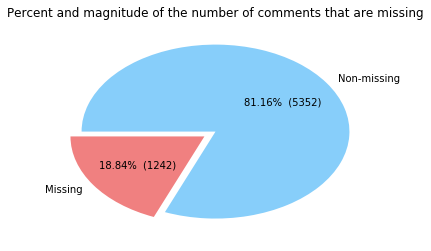

In [2]:
is_null = comments['Date'].isnull()
miss = is_null.sum() # number of missing values
non = len(is_null) - miss # number of non-insulting comments
values = [miss,non]

labels = 'Missing', 'Non-missing'
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  # explode 1st slice

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct


plt.title("Percent and magnitude of the number of comments that are missing")
plt.pie(values, explode=explode, labels=labels, colors=colors,
        autopct=make_autopct(values), startangle=180);

**Below we check whether the instances with missing data are distributed evenly by graphing the frequency of missing data over the histogram of raw comment length.**

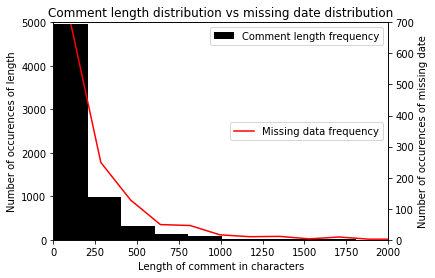

In [3]:
def true_length(input):
    if type(input) is str:
        return len(bytes(input, 'ascii').decode('unicode-escape'))
    else: 
        return -1 #arbitrary, should not ever happen with this dataset

comments['Raw_Length']  = comments['Comment'].str.len()
comments['True_Length'] = comments['Comment'].apply(lambda x: true_length(x))

# comments = comments[comments['RawLength'] < 2500]

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.hist(comments.Raw_Length,color="black",bins=100, label="Comment length frequency", alpha=1)

data = comments[comments['Date'].isnull() == True].Raw_Length.values
y, binEdges = np.histogram(data, bins=100)
bincenters = 0.5*(binEdges[1:] + binEdges[:-1])
ax2.plot(bincenters, y, '-', label="Missing data frequency", color="red")

ax1.set_xlabel('Length of comment in characters')
ax1.set_ylabel('Number of occurences of length')
ax2.set_ylabel('Number of occurences of missing date')
plt.title('Comment length distribution vs missing date distribution');
ax1.set_xlim([0, 2000])
ax1.set_ylim([0, 5000])
ax2.set_xlim([0, 2000])
ax2.set_ylim([0, 700])

ax1.legend(loc=1);
ax2.legend(loc=5);
             
# Sorry for spaghetti code
# Also, the centers for the line on the graph should align with the center of the histogram.
# This is most likely due to how the bin edges are chosen based on the ranges of the data, which are different.

The curves have a similar shape, so an even distribution of missing data can be assumed. Usually we would test this with more features, however length is the only numerical one we have thus far, so this is the best we've got. 